## 로지스틱 회귀 하이퍼 파라미터 튜닝 

### 로지스틱 회귀 파라미터 C 
C 값이 클수록 모델은 지도 데이터를 완전히 분류할 수 있는 식별 경계선을 학습 
scikit-learn 로지스틱 회귀 C 기본값 1.0이다.

### 로지스틱 회귀 파라미터 penalty 
penalty는 모델의 복잡성에 대한 패널티 L1, L2 
- L1 : 데이터의 특징량을 중심으로 식별 경계선의 일반화를 도모 
- L2 : 데이터 전체의 가중치를 줄임으로써 식별 경계선의 일반화를 도모 

### 로지스틱 회귀 파라미터 mult_class 
mult_class 는 다항 분류에서 모델의 동작을 결정 
- ovr : 클래스에 대해 '속하는/속하지 않는' 두 값으로 답하는 문제에 적합 
- multnormail : 각 클래스로 분류될 확률도 고려되어 '속하는/속하지 않는' 그리고 '속할 가능성이 얼마인가'를 다루는 문제에 적합

### 로지스틱 회귀 파라미터 random_state 
모델은 학습 시 데이터를 임의의 순서로 처리해 나감 
rnadom_state 는 그 순서를 제어함 
로지스틱 회귀 모델은 처리 순서 때문에 경계선이 변경되는 경우가 있다 
random_state 값을 고정시켜 동일한 학습 결과를 보전할 경우, 

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import make_classification 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
%matplotlib inline 

In [10]:
# 데이터 생성 
X, y = make_classification(n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [12]:
# C 값의 범위 설정 (0.00001 ~ 10000)
C_list = [10**i for i in range(-5, 5)]
C_list 

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [13]:
# 그래프 작성용 빈 리스트 선언 
train_accuracy = []
test_accuracy = []

In [14]:
for c in C_list : 
    model = LogisticRegression(C=c, random_state=42)
    model.fit(train_X, train_y)
    
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [20]:
train_accuracy 

[0.928495197438634,
 0.928495197438634,
 0.928495197438634,
 0.9263607257203842,
 0.9306296691568837,
 0.9306296691568837,
 0.9306296691568837,
 0.9306296691568837,
 0.9306296691568837,
 0.9306296691568837]

In [16]:
test_accuracy 

[0.9265175718849841,
 0.9265175718849841,
 0.9297124600638977,
 0.9265175718849841,
 0.9265175718849841,
 0.9265175718849841,
 0.9265175718849841,
 0.9265175718849841,
 0.9265175718849841,
 0.9265175718849841]

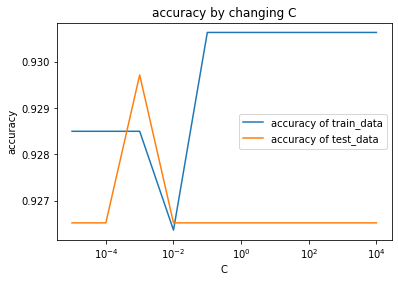

In [19]:
# 정확도 시각화 
# semilogx() 는 x 의 스케일을 10의 x 승 스케일로 변경 
plt.semilogx(C_list, train_accuracy, label='accuracy of train_data')
plt.semilogx(C_list, test_accuracy, label='accuracy of test_data')
plt.title('accuracy by changing C')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## 